In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

In [13]:
data=pd.read_csv("C:/Users/DOMNIC KORIR/Desktop/test jupyter/insurance.csv")

In [ ]:
#1 understanding the data

In [14]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [15]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [17]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [19]:
data.shape

(1338, 7)

In [20]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [21]:
data.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [22]:
data['age'].unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39], dtype=int64)

In [23]:
data['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [24]:
#cleaning the data

In [25]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [26]:
insurance=data.drop(['smoker', 'region'],axis=1)

In [27]:
insurance.head()

,age,sex,bmi,children,charges
0,19,female,27.900,0,16884.92400
1,18,male,33.770,1,1725.55230
2,28,male,33.000,3,4449.46200
3,33,male,22.705,0,21984.47061
4,32,male,28.880,0,3866.85520


In [28]:
#3 relationship analysis

In [29]:
corelation=insurance.corr()

<AxesSubplot: >

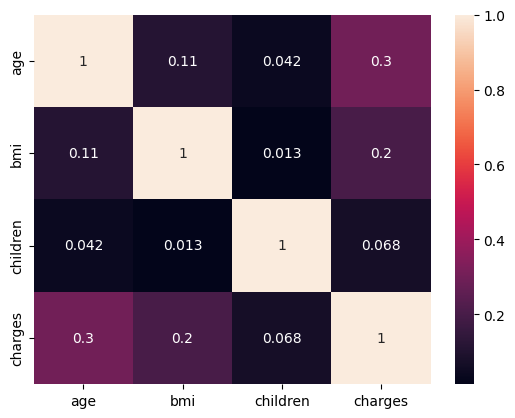

In [32]:
sns.heatmap(corelation,xticklabels=corelation.columns, yticklabels=corelation.columns, annot=True)

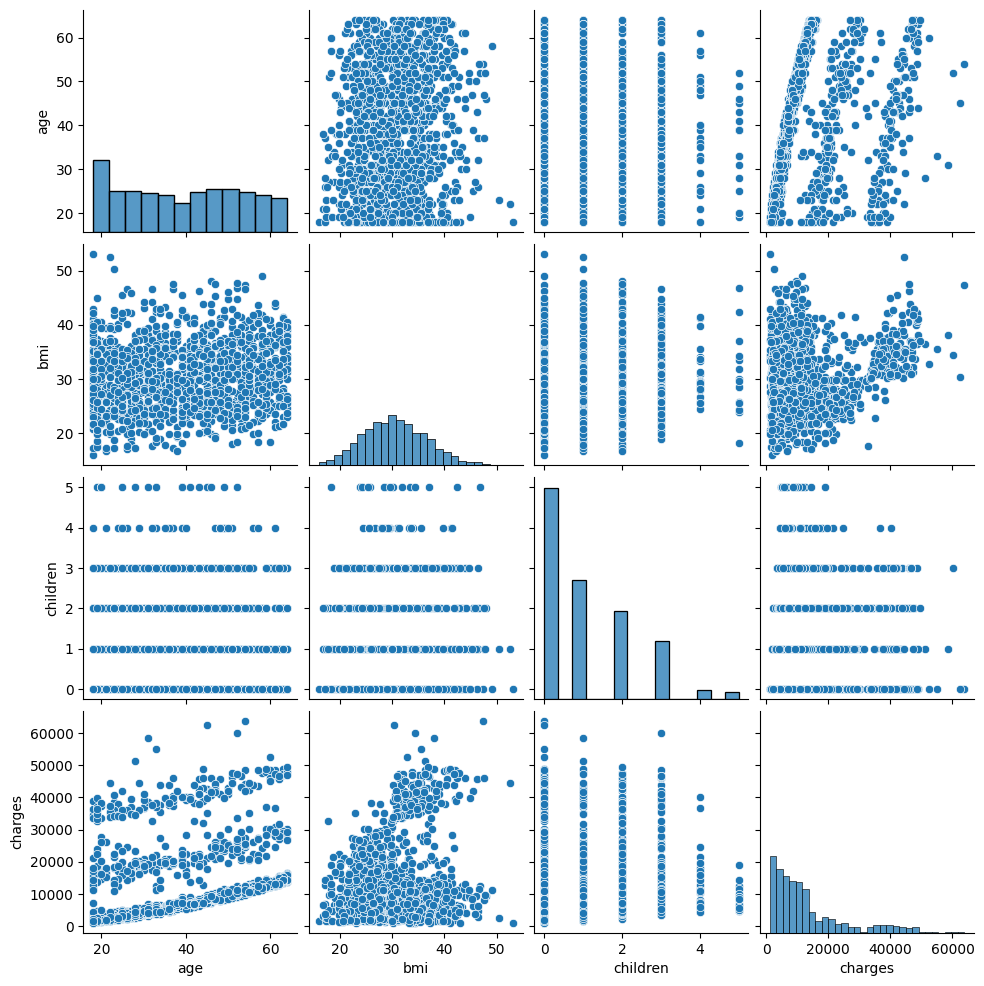

In [33]:
sns.pairplot(insurance)

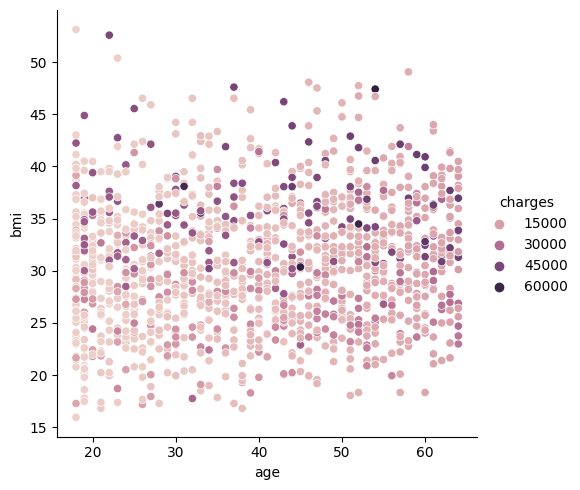

In [34]:
sns.relplot(x='age',y='bmi',hue='charges',data=insurance)

<AxesSubplot: xlabel='age', ylabel='Density'>

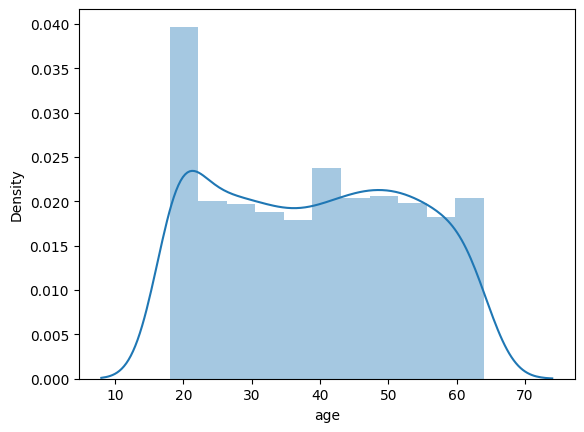

In [35]:
sns.distplot(insurance['age'])

<AxesSubplot: xlabel='bmi', ylabel='Density'>

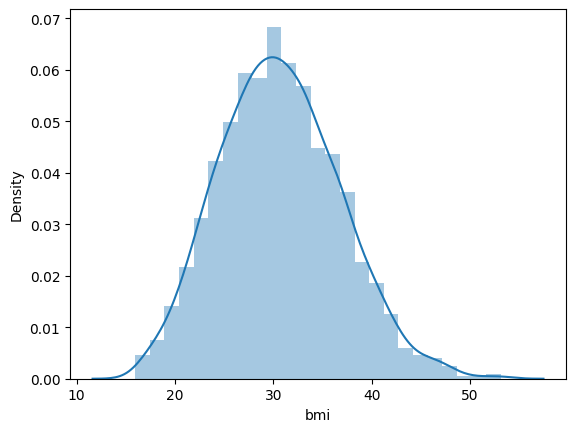

In [36]:
sns.distplot(insurance['bmi'])

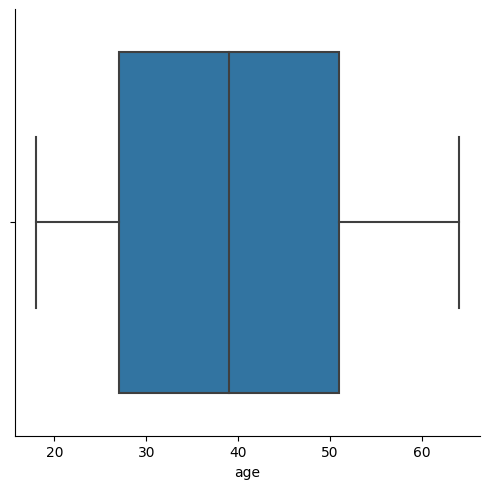

In [38]:
sns.catplot(x='age',kind='box',data=insurance)

In [48]:
# Creating X and y
X = insurance['age']
y = insurance['sex']

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

In [51]:
# Take a look at the train dataset
X_train
y_train

966       male
522     female
155       male
671     female
1173      male
         ...  
802       male
53        male
350     female
79      female
792     female
Name: sex, Length: 936, dtype: object

In [53]:
# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)